In [1]:
"""
IMPORTING LIBRARY:

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
from IPython.display import display
plt.style.use('fivethirtyeight')  # Apply a modern, consistent visual theme
%matplotlib inline 
# Display all charts directly within the notebook
import yfinance as yf
import datetime as dt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [2]:
# 🌍 SAMPLE GLOBAL STOCKS (For Reference)
# -------------------------------------------------------------
#  1.  Apple Inc.                ->  AAPL
#  2.  Microsoft Corporation     ->  MSFT
#  3.  Alphabet Inc. (Google)    ->  GOOG
#  4.  Amazon.com Inc.           ->  AMZN
#  5.  Tesla Inc.                ->  TSLA
#  6.  NVIDIA Corporation        ->  NVDA
#  7.  Meta Platforms Inc.       ->  META
#  8.  Netflix Inc.              ->  NFLX
#  9.  JPMorgan Chase & Co.      ->  JPM
# 10.  The Coca-Cola Company     ->  KO
# 11.  Johnson & Johnson         ->  JNJ
# 12.  Visa Inc.                 ->  V
# 13.  Mastercard Inc.           ->  MA
# 14.  Intel Corporation         ->  INTC
# 15.  Cisco Systems Inc.        ->  CSCO
# 16.  PepsiCo Inc.              ->  PEP
# 17.  Procter & Gamble Co.      ->  PG
# 18.  Adobe Inc.                ->  ADBE
# 19.  Salesforce Inc.           ->  CRM
# 20.  McDonald's Corporation    ->  MCD
# -------------------------------------------------------------
#  Example Input: AAPL  (for Apple Inc.)
#  Tip: Use only ticker symbols when entering stock name.



#--------------------------------------- THEORY PART FOR BETTER UNDERSTANDING -------------------------------------------------

"""
RNN (Recurrent Neural Network)
RNN is a type of neural network that works well with sequence data — data that changes over time, like stock prices, text, or weather.
It remembers what happened before and uses that information to make better predictions later.
For example:
If you are predicting tomorrow's stock price, RNN looks at the previous prices to guess the next one.
But — RNN has a problem.
When the sequence becomes too long, it forgets old information because its memory is limited.


LSTM (Long Short-Term Memory Network)
LSTM is an improved version of RNN.
It has a better memory system that helps it remember important information for a long time and ignore unnecessary details.
It does this using three gates:
Forget Gate: Decides what to forget.
Input Gate: Decides what new information to remember.
Output Gate: Decides what to use for the current prediction.
Because of this, LSTM is much better for time-series forecasting, text generation, or stock trend prediction — anything that needs to remember long-term patterns.


API stands for Application Programming Interface.
Think of it as a bridge that allows two software systems to talk to each other 
— share data, request services, or send commands — without revealing the internal details of how they work.


What is TensorFlow?
TensorFlow is an open-source deep learning framework created by Google.

It's a mathematical computation library that makes it easy to build, train, and deploy machine learning (ML) and deep learning (DL) models. 
Think of TensorFlow as the “engine” that does all the heavy numerical work — matrix multiplication, gradient computation, GPU acceleration, etc.

In Simple Words
If Keras is your driver's dashboard (simple controls like steering and buttons),
then TensorFlow is the engine under the hood that actually powers the car.
You tell Keras what to build → Keras uses TensorFlow to make it run efficiently.



"""

In [3]:
#---------------------------- INPUT AND DATE WINDOW ---------------------------
stock=input("Enter the stock Name: ").upper()
start=dt.datetime(2015,1,1)
end=dt.datetime(2025,10,16)
print()
print()
print(f"--------------------------  The information about {stock}  ----------------------------- ")
#------------------------------- DOWNLOAD THE STOCK DATA -------------------------------
df=yf.download(stock,start,end)
if isinstance(df.columns, pd.MultiIndex): df.columns = df.columns.get_level_values(0)
df=df.reset_index() # CONVERTS THE DATA INTO MORE READABLE AND EASY TO PLOT
display(df.columns)
display(df.head(2))
display(df.tail(2))
display(df.shape)
df.to_csv("stock.csv",index=False)

# ---------------------------------- CLEANING PROCESS BEFORE VISUALIZATION -------------------------------------
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
# ------------------ CONVERTING DATA INTO NUMERIC -------------------
for col in ['Open','High','Low','Close','Volume']:
    df[col]=pd.to_numeric(df[col],errors='coerce')
# --------------DROP INVALID ROWS -----------------
df=df.dropna(subset=['Open','High','Low','Close']).reset_index(drop=True)
# ------------- SORTING VALUES -----------------
df=df.sort_values('Date').reset_index(drop=True)

#------------------- MOVING AVERAGE: IT IS USED TO FORECAST THE UPCOMING DAYS PRICE OF STOCKS ------------------
temp_df=[10,20,30,40,50,60,70,80,90,100,110]
x=len(temp_df)
for i in range(x-4): # TAKES 5 CONSECUTIVE DATA AND FINDS THEIR AVG AND MOVE TO FIND SHORT TERM FLUCTUATION 
    ma=(temp_df[i]+temp_df[i+1]+temp_df[i+2]+temp_df[i+3]+temp_df[i+4])/5
    print(ma)
df['ma100']=df.Close.rolling(100).mean() # LAST 100 DAYS AVG CLOSING PRICE 
df['ma200'] =df.Close.rolling(200).mean() # LAST 200 DAYS AVG CLOSING PRICE 
#---------------------------- PLOTING THE DATA USING PLOTLY ------------------------------ 

fig=make_subplots(
    rows=2,cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_heights=[0.75,0.25]
)
# --------------------------------------- CANDLESTICK TRACE ----------------------------------------------
fig.add_trace(
    go.Candlestick(
        x=df['Date'], #SET THE X AXIS AS DATE COLUMN 
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name=f"{stock} price ",
        increasing_line_color='green',
        decreasing_line_color='red'
    ),
    row=1,col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'],y=df['ma100'],mode='lines',name='ma100',line=dict(color='orange',width=1)),
    row=1,col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'],y=df['ma200'],mode='lines',name='ma200',line=dict(color='cyan',width=1)),
    row=1,col=1
)
fig.add_trace(
    go.Bar(
        x=df['Date'],
        y=df['Volume'],
        name='Volume',
        marker_color='darkblue'),
    row=2,col=1
)
fig.update_layout(
    title=f"{stock} — Advanced Candlestick Chart with Volume",
    height=750,                        # taller figure
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)
fig.update_xaxes(rangeslider_visible=True, row=2, col=1)
fig.update_xaxes(type='date', tickformat='%Y-%m-%d')
fig.show()

#----------------------------- SPLIT THE DATA INTO TRAINING AND TESTING SETS ----------------------------
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
# display(data_training.shape)
# display(data_testing.shape)
# ------------------- APPLY MIN-MAX SCALING ---------------------------------
# USE OF MinMaxScaler(): IT SCALES THE NUMERIC DATA FROM 0 TO 1 TO TRAIN AND OPERATE THE DATA MORE EFFICIENTLY
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=Scaler.fit_transform(data_training)
display(data_training_array.shape)
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]): # data_training_array.shape[0] GIVES TOTAL NUMBER OF DATA POITS 
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
# ------------------------------- CONVERT LISTS INTO NUMPY ARRAYS FOR NEURAL NETWORKS ---------------------------------
x_train,y_train=np.array(x_train),np.array(y_train)



--------------------------  The information about NVDA  ----------------------------- 


C:\Users\faisal\AppData\Local\Temp\ipykernel_16020\1377651894.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

Price,Date,Close,High,Low,Open,Volume
0,2015-01-02,0.483011,0.486611,0.475333,0.483011,113680000
1,2015-01-05,0.474853,0.484451,0.472694,0.483011,197952000


Price,Date,Close,High,Low,Open,Volume
2711,2025-10-14,180.019974,184.789712,179.689990,184.759715,205641400
2712,2025-10-15,179.819992,184.859705,177.280125,184.789717,214450500


(2713, 6)

30.0
40.0
50.0
60.0
70.0
80.0
90.0


(1899, 1)

In [4]:
#-------------------------------------- MODEL BUILDING ----------------------------------------
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
# ---------------------- MODEL INITIALIZATION ------------------------
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True)) #Rectified Linear Unit (RelU) activation function makes learning faster and helps avoid vanishing gradients
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error') #Adam (Adaptive Moment Estimation)
model.fit(x_train,y_train,epochs=5) # One epoch means the model has seen all training data once. So epochs=50 → it will go through the entire training data 50 time

c:\Users\faisal\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning:

Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.

c:\Users\faisal\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning:

Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.

c:\Users\faisal\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning:

Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        72,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,661 (604.14 KB)

 Trainable params: 154,661 (604.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 241ms/step - loss: 0.0191
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 226ms/step - loss: 0.0065
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - loss: 0.0048
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - loss: 0.0052
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - loss: 0.0048


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step


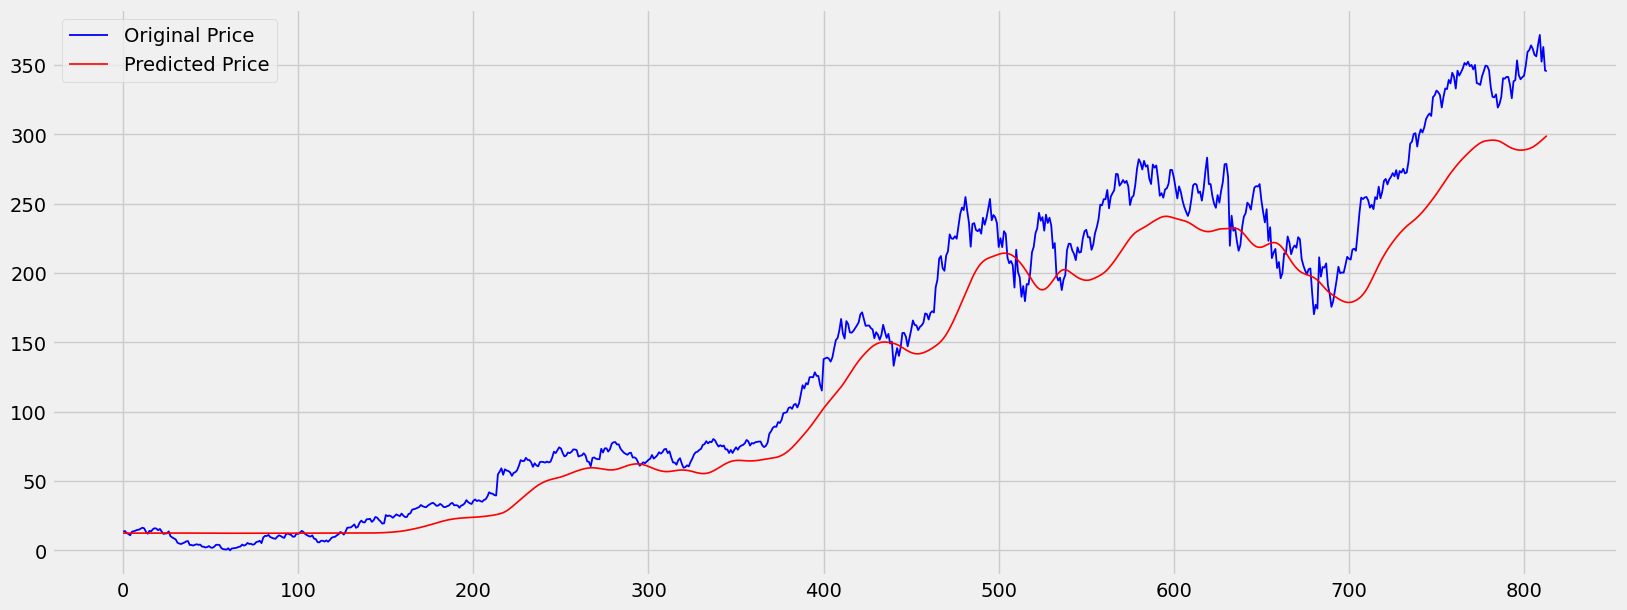

In [5]:
past_100_days=data_training.tail(100)
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
input_data=Scaler.fit_transform(final_df)
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
y_predicted=model.predict(x_test)
Scaler.scale_
scaler_factor=1/0.00268991
y_predicted=y_predicted*scaler_factor
y_test=y_test*scaler_factor
plt.figure(figsize=(18,7))
plt.plot(y_test,label='Original Price',linewidth=1.3,color='blue')
plt.plot(y_predicted,label='Predicted Price',linewidth=1.2,color='red')
plt.legend()
plt.show()
model.save('stock_dl_model.h5')